# Ejercicio # 1 

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [28]:
import numpy as np
m = np.linspace(0,0.5,6)
n = np.linspace(0.51,0.6,10)
o = np.linspace(0.6,1,5)
xs = np.concatenate((m,n,o),axis=0, out=None)
xs


array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

# Ejercicio 2 

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

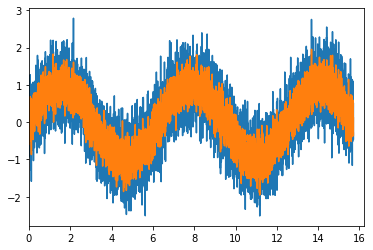

In [29]:
import matplotlib.pyplot as plt
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()
y1 =  []
#for n in range(1,len(y)-1):
#    ys[n] = (y[n-1] + y[n] + y[n+1])/3

y1 = y[0:-1]#el primer valor que es el n-1, me retorna valor 
y1 = np.insert(y1,0,0) # Contiene y[n-1]

y2 = y[1:len(y)] # y[n+1]
y2 = np.append(y2,0)

ys = (y1+y2+y)/3

plt.plot(x,y)
plt.plot(x,ys)

plt.xlim(0,5*np.pi + 0.5)
plt.show()

# Ejercicio 3
**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [30]:
# tu codigo aqui (~ 4 lineas de codigo)
#para cada elemento el logaritmo de base 2 multiplicar por su probabilidad
#y sumar todos los valores resultantes para multiplicarlo por negativo.
#No hay que hacer la sumatoria, solo implementar el calculo.

def entropy(px):
    np.log2(px)*-1 #aqui solo falta agregar la probabilidad


# Ejercicio 4 
**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [44]:
def g(x):
    
    gx = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50 #Este viene del ejercicio anterior
    cx = (np.power(x,2) + x + (np.log(0.0001*x))- np.sqrt(0.54*x))/100 #Este lo armamos con la formula dada
    return gx-cx # vector del mismo tamaño
    
gastos = np.array([100,50,25,100])
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20298.85689469  2574.42504495   330.9752857  20298.85689469]


#### Aritmetica acumulativa

En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

**Ejemplo aplicado** En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion **np.cumsum** para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:


# Ejercicio 5 
**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [32]:
#la moda de cierto vector dado X
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    conteo = np.bincount(x)
    print(max(conteo), " Contero")
    val_ret = np.argmax(conteo)
    #cont_val = len(val)
    #return(val, cont)
    #print(val_ret,max(conteo) )
    #val = np.argmax(x)
    return (val_ret,max(conteo) )
    
    
    #print(val)
variable = [1,2,2,2,3,4,5,5,5,5,6,7,5,4,3,4,5,67,8,8,9,9,9,9,9,9,9,9,9,9,0,5,5,5,5,5,5,5,5]
mode(variable)


14  Contero


(5, 14)

# Ejercicio 6 
**Ejercicio 6** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [33]:

def entrop_func(x):
# tu codigo aqui (~ 3 lineas de codigo)
#Distribuciones de probabilidad discretas de la siguiente forma
    dist_a = np.array([0.3,0.5,0.2])   #de cierta variuable aletoria a
#Calcular el log vbase de dos de cada una de las probabilidadas por la probabilidad, la sumatoria de eso por menos 1
# a mayor entropia mayor incerteza.
    cx =  (x * (np.log2(x)))*-1
#usar operaciones vectorizadas de numpy
    return cx
variable = [1,2,2,2,3]
entrop_func(variable)



array([-0.       , -2.       , -2.       , -2.       , -4.7548875])

# Ejercicio 7 
**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [34]:
#logaritmo natural, no logaritmo base 2.
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 o 2 lineas de codigo)
    minval=0.0000000001
    cx = (y * (np.log(y_hat.clip(min=minval))))*-1
    return cx
y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1])

cross_entropy(y,y_hat)

array([0.35667494, 0.        , 0.        ])

# Ejercicio 8 
**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [35]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    
    return (np.sqrt((np.sum(np.power(x,2)))))
    #return np.linalg.norm(x) -----Esta función hace lo mismo
    
errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

v1 = magnitud(errores_modelo1)
v2 = magnitud(errores_modelo2)


#elegir el mejor modelo con un IF
if v1 < v2:
    print ("Errores modelo 1  ", v1, "es mejor modelo que errores_modelo 2 ", v2  )
else:
    print ("Errores modelo 2  ", v2, "es mejor modelo que errores_modelo 1 ", v1  )

Errores modelo 2   2.449489742783178 es mejor modelo que errores_modelo 1  3.1622776601683795


# Ejercicio 9 
**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [36]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    return (np.linalg.norm(x))
#dividiendolo por su magnitud    
    

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

#El mejor es el que genere un vector de errores cuya magnitud es menor

3.1622776601683795
2.449489742783178


# Ejercicio 10
**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9] Aunque genera un valor recibe dos valores

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [37]:
#Capa de entrada son datos, cada usuario está definido por un vector de 2 elementos
#HL1 producto punto entre dos vectores, HL1res = dot(x,hl1)
#el segundo circulo, que recibe [-8,14], es el producto punto HL2Res = dot(x,HL2)
#estos dos nos dan un elemento como resultado, hl1res y hl2res
#estros ya apuntan al ultimo circulo, el producto punto entre el vector creado de HL1res y hl2res y el que nos dan el na deficinion
#como salida del vector[4,9]
#Output O = dot(HLr, OUTLAYER_OUTPUT)
#al final tendriamos que hacer 3 productos puntos y ciertos analisis.
#si el producto punto del primer circulo es mayor, o cualquiera de ellos que lo genere
#es aquel que el patrón está en mayor presencia o en mayor medida en el patrón de entrada.

# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])


# Ejercicio 11
**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [38]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido #el ruido debe ir sumado a los datos simulados al Seno.

filtro = np.array([1/3,1/3,1/3]) # este es 1/3 porque nuestro vector tiene 3 dimensiones. #Para lograr las medias moviles a travez de correlacion cruzada.
#xq = [a,b,c]
#h1= 1/3a + 1/3b + 1/3c
#Un vector que representa G, que hay que hacerle producto punto de [1/3,1/3,1/3]
## tu codigo aqui (~ 3 linea de codigo)


# Ejercicio 12
**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [39]:
import numpy as np
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)

##Ver cuales elementos son negativos - vector de booleanos
#multiplicarlo x -1
#modificar o copiar el vector x
###el vector del primero paso reemplazar los que eran negativos por su valor calculado en el paso 2
y = x<0
y = y*-1
x = x>=0
x = x,y
print(x)

(array([False, False, False, False,  True,  True,  True,  True,  True]), array([-1, -1, -1, -1,  0,  0,  0,  0,  0]))


# Ejercicio 13
**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [45]:
x = np.arange(10)

condiciones = [x<0,x>3,x<2,x>0] #lista A 
resultados =  [x*-1,0,x**2, x**3] #lista B




print(x)
#los valores de x que no satisfacen ningúna condicion obtendran 0 como resultado(este es el valor default)
np.select(condiciones,resultados)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  8, 27,  0,  0,  0,  0,  0,  0])

*Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x<=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [ ]:
x = np.linspace(-3, 3, 10)
np.piecewise(x, [x < 0, x >=1, x >= 0], [lambda x:np.exp(2*x), lambda x:1, lambda x:np.exp(1-x)])


    

## Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy       
def proye_vec(a1,a2):
    v_norma = np.sqrt(sum(a1**2))  
    proy_a1_en_a2 = (np.dot(u, v)/v_norm**2)*v 
    
    * interpretación
    ____
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
    __Puede ser utilizado en data science en clasificaciones de Naive
* Producto cruz
    * calculo en numpy
        __np.cross(a,b)__
    * interpretación
        __Es el producto que equivale al area del paralelogramo construido entre  dos vectores y el vector resultante es perpendicular al plano de estos dos vectores__
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo: __En Machine Learning se utiliza el cross product, por ejemplo para el procesamiento de imagenes__
    
#### Referencias

* https://www.oreilly.com/library/view/data-science-from/9781491901410/ch04.html
* https://towardsdatascience.com/linear-algebra-cheat-sheet-for-deep-learning-cd67aba4526c
* https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/
* https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf
* https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
* https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab